# Goal to apply affine transformations to 2D images 
![alt Transformations](img/tuto_transformations.png "Affine Transformations")

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [96]:
# PS: X and Y are inverted in CV@ 
def scaling(sx,sy):
    return np.array([[sx,0,0],[0,sy,0],[0,0,1]])
def translation(tx,ty):
    return np.array([[1,0,tx],[0,1,ty],[0,0,1]])
def rotation(angle):
    cosx = np.cos(angle)
    sinx = np.sin(angle)
    return np.array([[cosx,-sinx,0],[sinx,cosx,0],[0,0,1]])
def skew(mx):
    return np.array([[1,mx,0],[0,1,0],[0,0,1]])

def applyTransform(image,trans):
    result = np.zeros_like(image)
    for i in range(0,image.shape[1]):
        for j in range(0,image.shape[0]):
            pos = np.matmul(trans, np.array([i,j,1]))
            if pos[0]< image.shape[1] and pos[0] > 0 and pos[1]>0 and pos[1] < image.shape[0]: 
                result[int(pos[1])][int(pos[0])] = image[j][i]
    return result

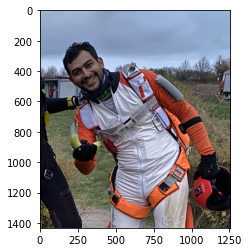

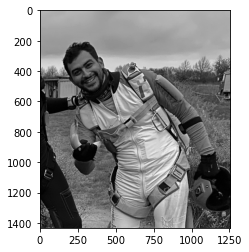

(1433, 1256)

In [97]:
img = cv2.imread("img/img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap="gray")
plt.show()
gray.shape

Translation


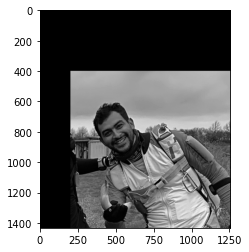

In [98]:
print("Translation")
translation_matrix = translation(200,400)
result_translation = applyTransform(gray,translation_matrix)
plt.imshow(result_translation,cmap="gray")
plt.show()

Rotation


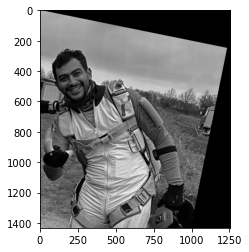

In [106]:
print("Rotation")
rotation_matrix = rotation(0.2)
result_rotation = applyTransform(gray,rotation_matrix)
plt.imshow(result_rotation,cmap="gray")
plt.show()

Scaling


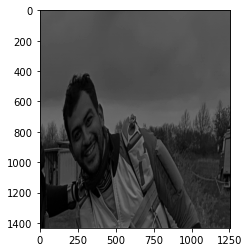

In [107]:


print("Scaling")
scaling_matrix = scaling(1.0,2.0)
result_scaling = applyTransform(gray,scaling_matrix)
plt.imshow(result_scaling,cmap="gray")
plt.show()

Skew


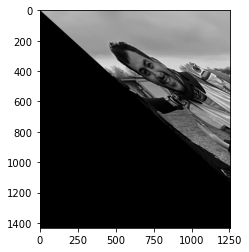

In [103]:
print("Skew")
translation_skew = skew(1.1)
result_skew = applyTransform(gray,translation_skew)
plt.imshow(result_skew,cmap="gray")
plt.show()

Translation and rotation


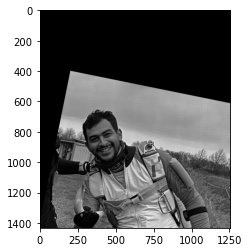

In [109]:

print("Translation and rotation")
mix_matrix = np.matmul(translation_matrix,rotation_matrix)
result_mix = applyTransform(gray,mix_matrix)
plt.imshow(result_mix,cmap="gray")
plt.show()